In [1]:
import numpy as np

In [2]:
x = np.array([[1,2,3],[4,5,6]])
print("x =\n{}".format(x))

x =
[[1 2 3]
 [4 5 6]]


In [3]:
from scipy import sparse

In [4]:
eye = np.eye(4)
print(eye)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [5]:
sparse_matrix = sparse.csr_matrix(eye)
print(sparse_matrix)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [6]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices , col_indices)))
print(eye_coo)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

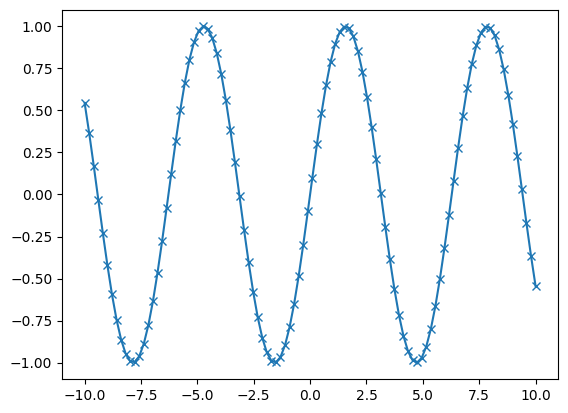

In [8]:
x = np.linspace(-10 , 10 , 100)
y = np.sin(x)
plt.plot(x , y , marker="x")

In [9]:
import pandas as pd

In [10]:
data = {
    "Name":["John" , "Anna" , "Peter" , "Linda"],
    "Location":["New York" , "Paris" , "Berlin" , "London"],
    "Age":[24, 13, 53 , 33]
}

In [11]:
data_pandas = pd.DataFrame(data)
data_pandas

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [12]:
data_pandas[data_pandas.Age > 30]

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


In [13]:
import mglearn

In [14]:
from IPython.display import display

In [15]:
from sklearn.datasets import load_iris

In [16]:
iris_dataset = load_iris()

In [17]:
print(iris_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [18]:
print(iris_dataset["DESCR"][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [19]:
print(iris_dataset["target_names"])

['setosa' 'versicolor' 'virginica']


In [20]:
print(iris_dataset["feature_names"])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [21]:
print(type(iris_dataset["data"]))

<class 'numpy.ndarray'>


In [22]:
print(iris_dataset["target"].shape)

(150,)


In [23]:
print(iris_dataset["target"])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train , X_test , y_train , y_test = train_test_split(iris_dataset["data"],
                                                       iris_dataset["target"],
                                                       random_state=0)

In [26]:
print("X_train = " , X_train.shape)
print("y_train = " , y_train.shape)
print("X_test = " , X_test.shape)
print("y_test = " , y_test.shape)

X_train =  (112, 4)
y_train =  (112,)
X_test =  (38, 4)
y_test =  (38,)


In [27]:
iris_dataframe = pd.DataFrame(X_train , columns=iris_dataset.feature_names)

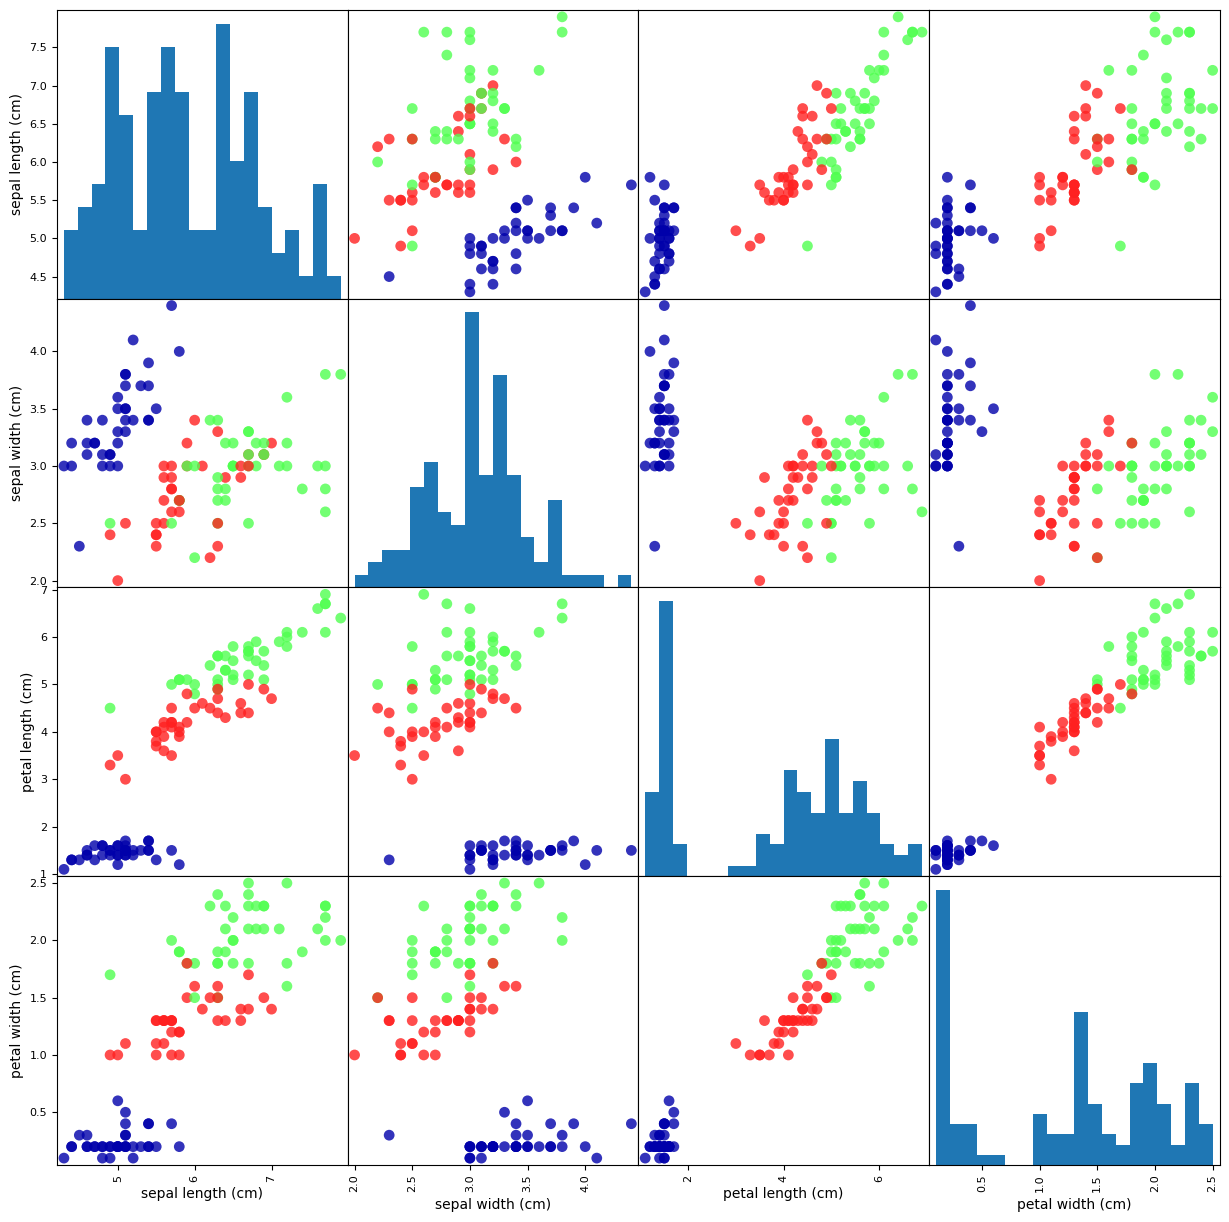

In [28]:
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15),
                        marker="o",hist_kwds={"bins":20} , s=60 , alpha=.8 , cmap=mglearn.cm3)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [30]:
knn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=1)

In [31]:
X_new = np.array([[5,2.9,1,0.2]])
print(X_new.shape)

(1, 4)


In [32]:
prediction = knn.predict(X_new)
print(prediction)
print(iris_dataset["target_names"][prediction])

[0]
['setosa']


In [33]:
y_pred = knn.predict(X_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [34]:
print(knn.score(X_test , y_test))

0.9736842105263158


In [35]:
X , y = mglearn.datasets.make_forge()

/Users/kato/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


(26, 2)


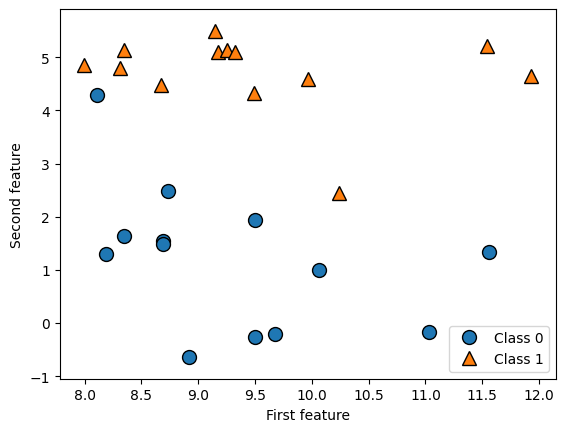

In [36]:
mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.legend(["Class 0" , "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print(X.shape)

Text(0, 0.5, 'target')

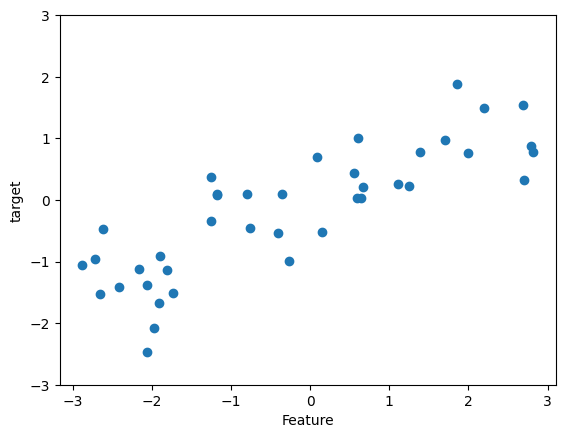

In [37]:
X , y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X , y , "o")
plt.ylim(-3 , 3)
plt.xlabel("Feature")
plt.ylabel("target")

In [38]:
from sklearn.datasets import load_breast_cancer

In [39]:
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [40]:
print(cancer.data.shape)

(569, 30)


In [41]:
print({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

{'malignant': 212, 'benign': 357}


In [42]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [43]:
from sklearn.datasets import load_boston

In [44]:
boston = load_boston()
print(boston.data.shape)

(506, 13)


/Users/kato/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

In [45]:
X , y = mglearn.datasets.load_extended_boston()
print(X.shape)

(506, 104)


/Users/kato/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


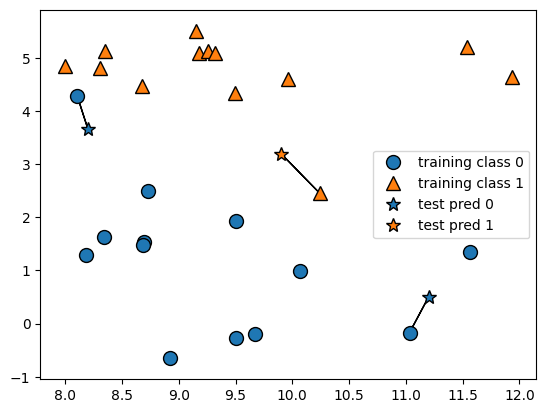

In [46]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/Users/kato/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


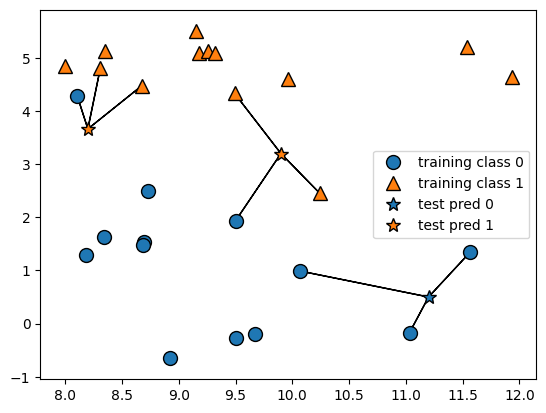

In [47]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [48]:
from sklearn.model_selection import train_test_split
X , y = mglearn.datasets.make_forge()

/Users/kato/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [49]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=0)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [51]:
clf.fit(X_train , y_train)
print(clf.predict(X_test))

[1 0 1 0 1 0 0]


In [52]:
print(clf.score(X_test , y_test))

0.8571428571428571


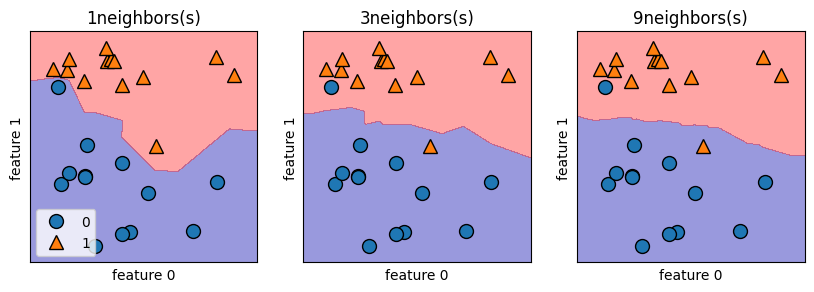

In [53]:
flg, axes = plt.subplots(1,3, figsize=(10,3))
for n_neighbors, ax in zip([1,3,9] , axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True, eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0] , X[:,1],y,ax=ax)
    ax.set_title("{}neighbors(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [54]:
X_train , X_test , y_train , y_test = train_test_split(cancer.data , cancer.target , stratify=cancer.target , random_state=66)

In [55]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 10)

In [56]:
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train , y_train)
    training_accuracy.append(clf.score(X_train , y_train))
    test_accuracy.append(clf.score(X_test , y_test))

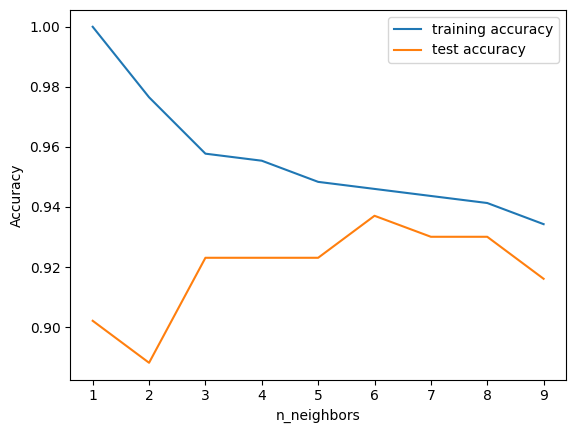

In [57]:
plt.plot(neighbors_settings , training_accuracy , label="training accuracy")
plt.plot(neighbors_settings , test_accuracy , label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

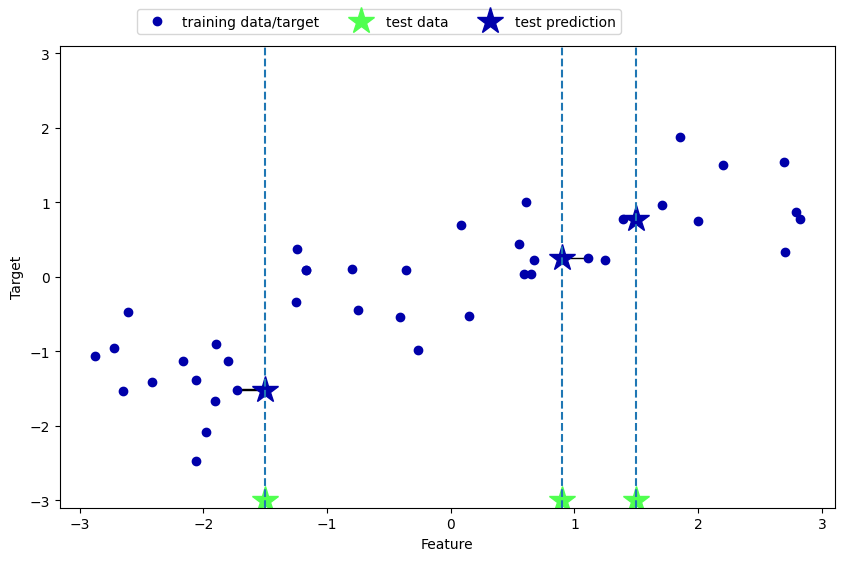

In [58]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

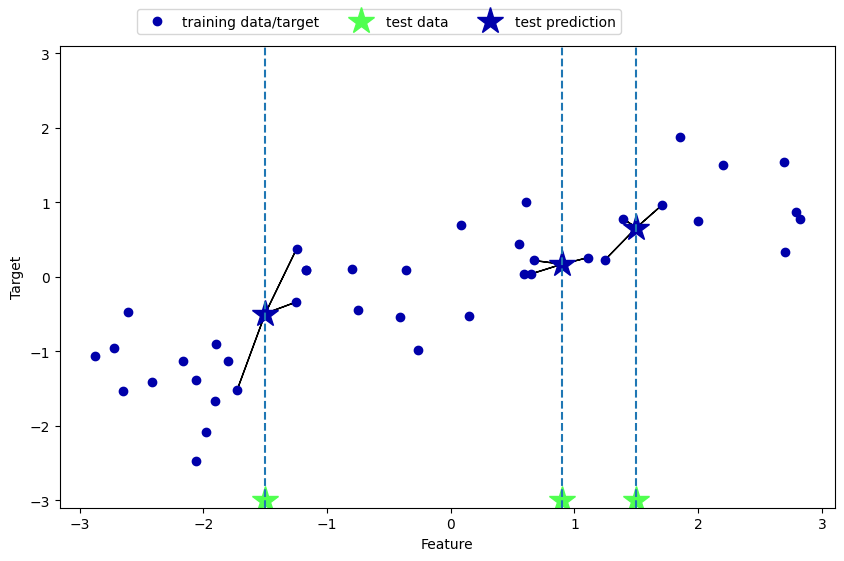

In [59]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [60]:
from sklearn.neighbors import KNeighborsRegressor

In [61]:
X , y = mglearn.datasets.make_wave(n_samples=40)
X_train , X_test , y_train , y_test = train_test_split(X,  y , random_state=0)

In [62]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train , y_train)

KNeighborsRegressor(n_neighbors=3)

In [63]:
print(reg.predict(X_test))

[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [64]:
print(reg.score(X_test , y_test))

0.8344172446249606


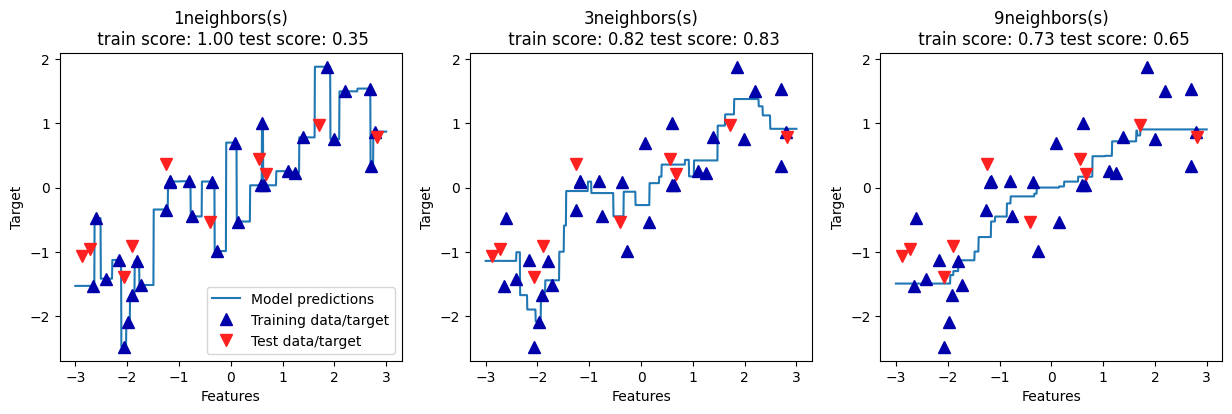

In [65]:
flg , axes = plt.subplots(1,3, figsize=(15, 4))
line = np.linspace(-3 , 3 , 1000).reshape(-1 , 1)
for n_neighbors , ax in zip([1 , 3 , 9] , axes):
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train , y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train , y_train , "^" , c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test , y_test , "v" , c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{}neighbors(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train , y_train), reg.score(X_test , y_test)))
    ax.set_xlabel("Features")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions" , "Training data/target" , "Test data/target"] , loc="best")

w[0]: 0.393906  b: -0.031804


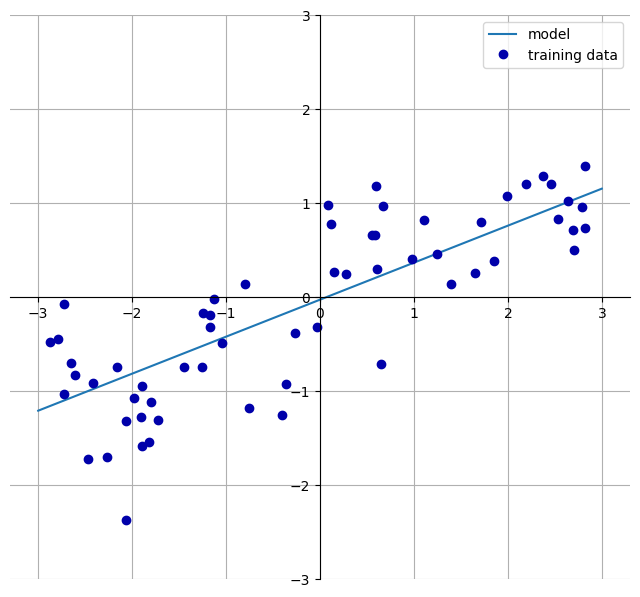

In [66]:
mglearn.plots.plot_linear_regression_wave()

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train , X_test, y_train , y_test = train_test_split(X , y , random_state=60)

In [69]:
lr = LinearRegression().fit(X_train , y_train)

In [70]:
print(lr.coef_)

[0.39657699]


In [71]:
print(lr.intercept_)

-0.04560036424392322


In [72]:
print(lr.score(X_train , y_train))

0.6307769935409305


In [73]:
print(lr.score(X_test , y_test))

0.7673950193522179


In [74]:
X , y = mglearn.datasets.load_extended_boston()

/Users/kato/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

In [75]:
X_train , X_test, y_train , y_test = train_test_split(X , y , random_state = 0)

In [76]:
lr = LinearRegression().fit(X_train , y_train)

In [77]:
print(lr.score(X_train , y_train))

0.9520519609032729


In [78]:
print(lr.score(X_test, y_test))

0.6074721959666263


In [79]:
from sklearn.linear_model import Ridge

In [80]:
ridge = Ridge().fit(X_train , y_train)

In [81]:
print(ridge.score(X_train , y_train))

0.8857966585170941


In [82]:
print(ridge.score(X_test , y_test))

0.7527683481744758


In [83]:
ridge10 = Ridge(alpha=10).fit(X_train , y_train)

In [84]:
print(ridge10.score(X_train , y_train))

0.7882787115369615


In [85]:
print(ridge10.score(X_test, y_test))

0.6359411489177311


In [86]:
ridge01 = Ridge(alpha=0.1).fit(X_train , y_train)

In [87]:
print(ridge01.score(X_train , y_train))

0.9282273685001983


In [88]:
print(ridge01.score(X_test , y_test))

0.772206793648017


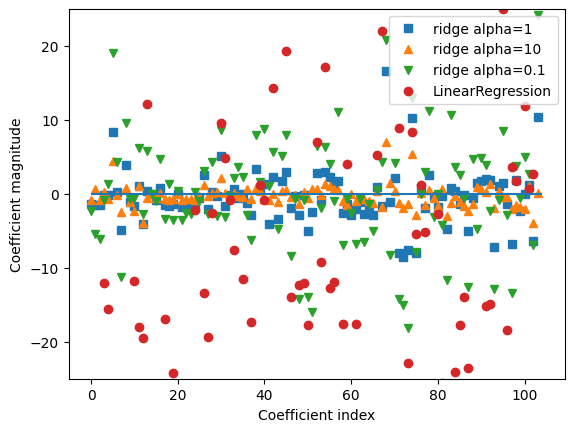

In [89]:
plt.plot(ridge.coef_ , "s" , label="ridge alpha=1")
plt.plot(ridge10.coef_ , "^" , label="ridge alpha=10")
plt.plot(ridge01.coef_ , "v" , label="ridge alpha=0.1")

plt.plot(lr.coef_ , "o" , label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25 , 25)
plt.legend()

In [90]:
from sklearn.linear_model import Lasso

In [91]:
lasso = Lasso().fit(X_train , y_train)

In [92]:
print(lasso.score(X_train , y_train))

0.29323768991114574


In [93]:
print(lasso.score(X_test , y_test))

0.2093750325527226


In [94]:
print(np.sum(lasso.coef_ !=0))

4


In [95]:
lasso001 = Lasso(alpha=0.01 , max_iter=100000).fit(X_train , y_train)

In [96]:
print(lasso001.score(X_train , y_train))
print(lasso001.score(X_test , y_test))
print(np.sum(lasso001.coef_ !=0))

0.8962226511086498
0.7656571174549984
33


In [97]:
lasso00001 = Lasso(alpha=0.0001 , max_iter=100000).fit(X_train , y_train)

In [98]:
print(lasso00001.score(X_train , y_train))
print(lasso00001.score(X_test , y_test))
print(np.sum(lasso00001.coef_ !=0))

0.9507158754515463
0.6437467421273048
96


Text(0, 0.5, 'Coefficient magnitude')

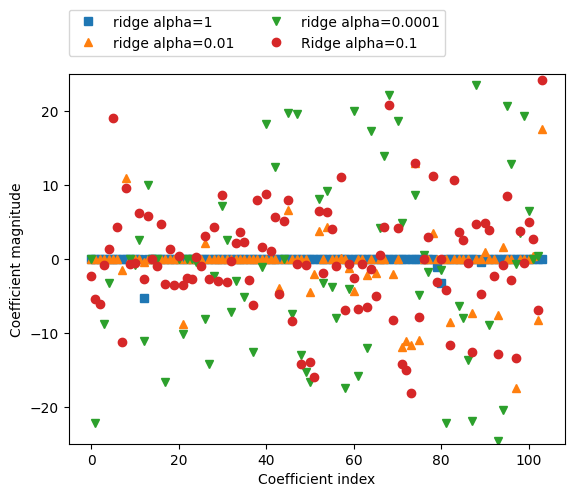

In [99]:
plt.plot(lasso.coef_ , "s" , label="ridge alpha=1")
plt.plot(lasso001.coef_ , "^" , label="ridge alpha=0.01")
plt.plot(lasso00001.coef_ , "v" , label="ridge alpha=0.0001")

plt.plot(ridge01.coef_ , "o" , label="Ridge alpha=0.1")
plt.legend(ncol=2 , loc=(0 , 1.05))
plt.ylim(-25 , 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [101]:
X , y = mglearn.datasets.make_forge()

/Users/kato/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


/Users/kato/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


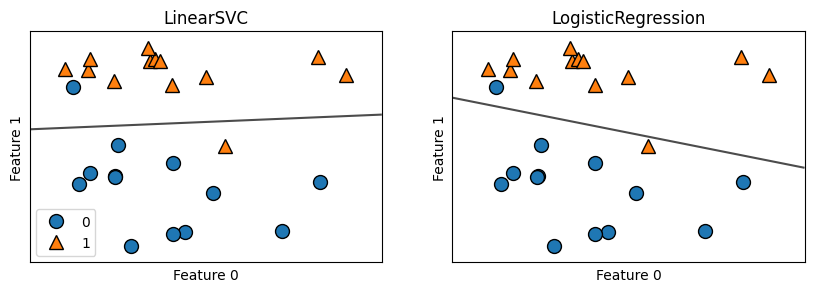

In [102]:
flg, axes = plt.subplots(1 , 2 , figsize=(10 , 3 ))

for model , ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X , y)
    mglearn.plots.plot_2d_separator(clf , X , fill=False , eps=0.5, ax=ax , alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

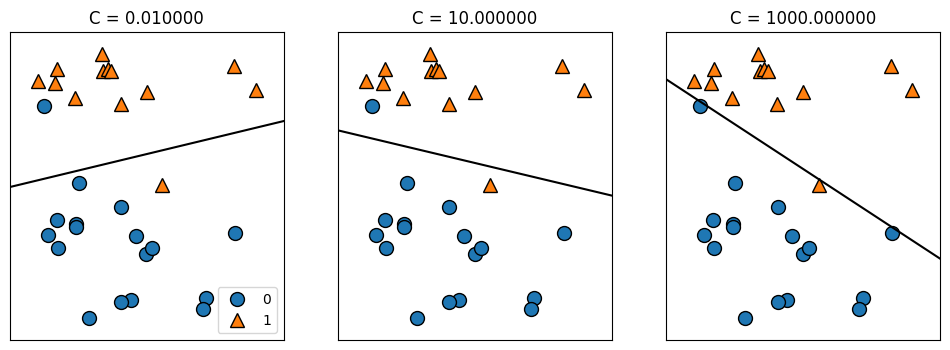

In [103]:
mglearn.plots.plot_linear_svc_regularization()

In [104]:
from sklearn.datasets import load_breast_cancer

In [105]:
cancer = load_breast_cancer()

In [106]:
X_train , X_test, y_train , y_test = train_test_split(cancer.data , cancer.target , stratify=cancer.target , random_state=42)

In [107]:
logreg = LogisticRegression().fit(X_train , y_train)

/Users/kato/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
print(logreg.score(X_train , y_train))

0.9436619718309859


In [109]:
print(logreg.score(X_test , y_test))

0.958041958041958


In [110]:
logreg100 = LogisticRegression(C=100).fit(X_train , y_train)
print(logreg100.score(X_train , y_train))
print(logreg100.score(X_test , y_test))

0.9460093896713615
0.958041958041958


/Users/kato/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
logreg001 = LogisticRegression(C=0.01).fit(X_train , y_train)
print(logreg001.score(X_train , y_train))
print(logreg001.score(X_test , y_test))

0.9342723004694836
0.9300699300699301


/Users/kato/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


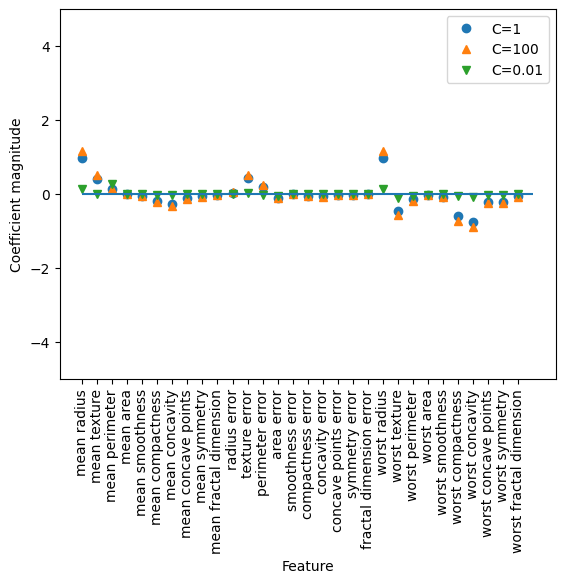

In [112]:
plt.plot(logreg.coef_.T , "o" , label="C=1")
plt.plot(logreg100.coef_.T , "^" , label="C=100")
plt.plot(logreg001.coef_.T , "v" , label="C=0.01")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5 , 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [113]:
from sklearn.datasets import make_blobs

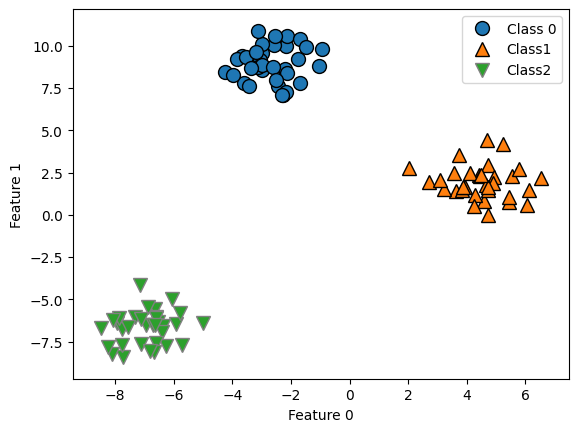

In [114]:
X , y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0" , "Class1" , "Class2"])

In [115]:
linear_svm = LinearSVC().fit(X , y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


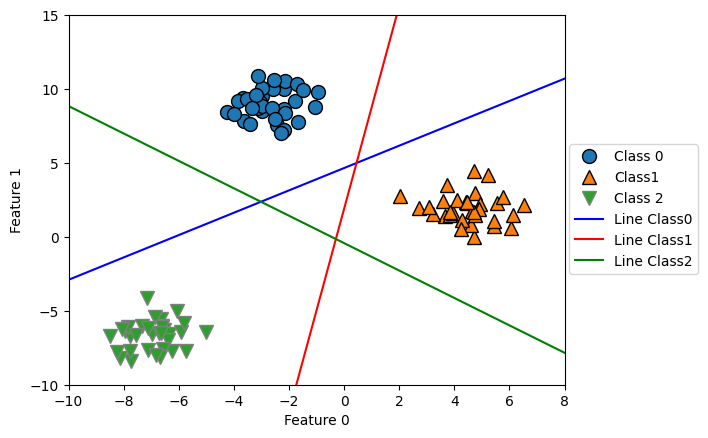

In [116]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15 , 15)
for coef, intercept , color in zip(linear_svm.coef_,linear_svm.intercept_,["b","r","g"]):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class1" , "Class 2", "Line Class0", "Line Class1" , "Line Class2"], loc=(1.01,0.3))

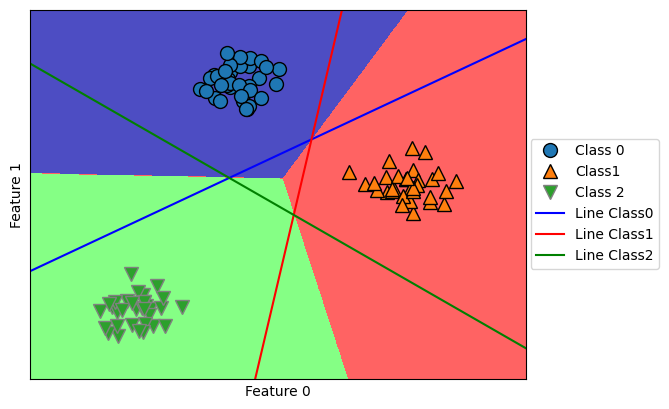

In [117]:
mglearn.plots.plot_2d_classification(linear_svm , X , fill=True , alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15 , 15)
for coef, intercept , color in zip(linear_svm.coef_,linear_svm.intercept_,["b","r","g"]):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1],c=color)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class1" , "Class 2", "Line Class0", "Line Class1" , "Line Class2"], loc=(1.01,0.3))

In [118]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train , y_train).predict(X_test)

/Users/kato/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
y_pred = LogisticRegression().fit(X_train , y_train).predict(X_test)

/Users/kato/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [120]:
X = np.array([[0,1,0,1],
             [1,0,1,1],
             [0,0,0,1],
             [1,0,1,0]])
y = np.array([0,1,0,1])

In [121]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print(counts)

{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
cancer = load_breast_cancer()
X_train , X_test, y_train , y_test = train_test_split(cancer.data , cancer.target , stratify=cancer.target , random_state=42)

In [124]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train , y_train)
print(tree.score(X_train , y_train))
print(tree.score(X_test , y_test))

1.0
0.9370629370629371


In [125]:
tree = DecisionTreeClassifier(max_depth=4 , random_state=0)
tree.fit(X_train , y_train)
print(tree.score(X_train , y_train))
print(tree.score(X_test , y_test))

0.9882629107981221
0.951048951048951


In [126]:
print(tree.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [127]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_,align="center")
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

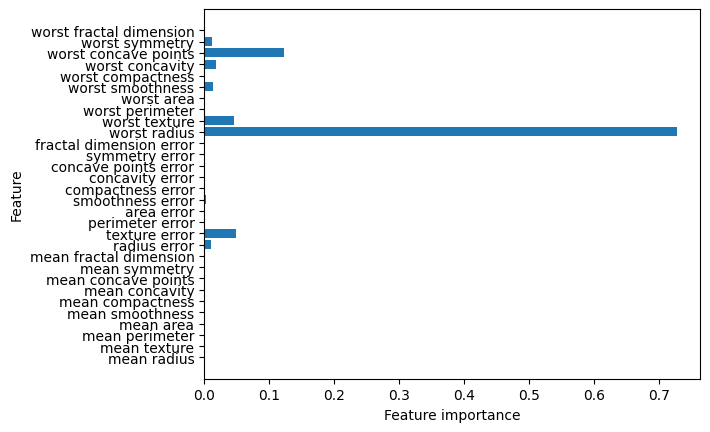

In [128]:
plot_feature_importances_cancer(tree)

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [130]:
X , y = make_moons(n_samples=100 , noise=0.25 , random_state=3)
X_train , X_test , y_train , y_test = train_test_split(X , y ,stratify=y, random_state=42)

In [131]:
forest = RandomForestClassifier(n_estimators=5 , random_state=2)
forest.fit(X_train ,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [132]:
X_train , X_test , y_train , y_test = train_test_split(cancer.data , cancer.target , random_state=0)
forest = RandomForestClassifier(n_estimators=100 , random_state=0)
forest.fit(X_train ,y_train)

RandomForestClassifier(random_state=0)

In [133]:
print(forest.score(X_train , y_train))
print(forest.score(X_test , y_test))

1.0
0.972027972027972


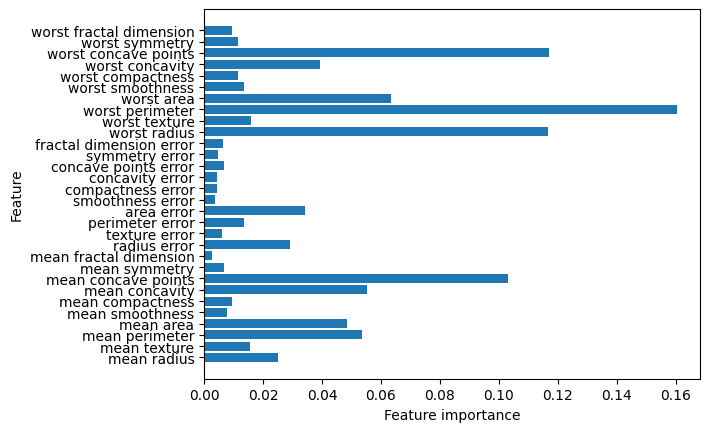

In [134]:
plot_feature_importances_cancer(forest)

In [135]:
from sklearn.ensemble import GradientBoostingClassifier

In [136]:
X_train , X_test , y_train , y_test = train_test_split(cancer.data , cancer.target , random_state=0)

In [137]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train , y_train)

GradientBoostingClassifier(random_state=0)

In [138]:
print(gbrt.score(X_train ,y_train))
print(gbrt.score(X_test , y_test))

1.0
0.965034965034965


In [139]:
gbrt = GradientBoostingClassifier(max_depth=1 , random_state=0)
gbrt.fit(X_train , y_train)

GradientBoostingClassifier(max_depth=1, random_state=0)

In [140]:
print(gbrt.score(X_train ,y_train))
print(gbrt.score(X_test , y_test))

0.9906103286384976
0.972027972027972


In [141]:
gbrt = GradientBoostingClassifier(max_depth=1 , random_state=0 , learning_rate=0.01)
gbrt.fit(X_train , y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, random_state=0)

In [142]:
print(gbrt.score(X_train ,y_train))
print(gbrt.score(X_test , y_test))

0.9272300469483568
0.958041958041958


In [143]:
gbrt = GradientBoostingClassifier(max_depth=1 , random_state=0)
gbrt.fit(X_train , y_train)

GradientBoostingClassifier(max_depth=1, random_state=0)

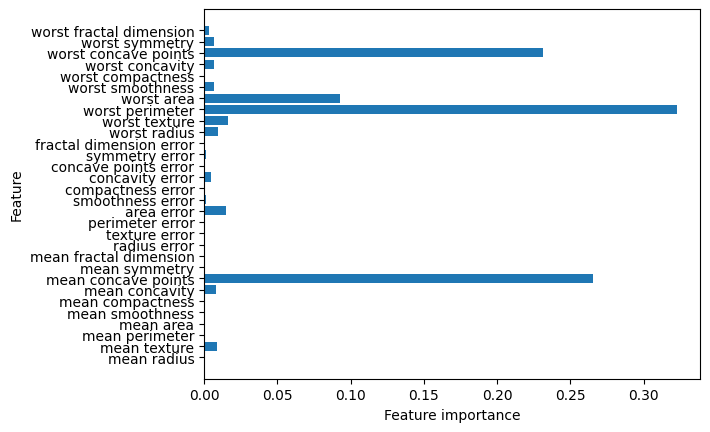

In [144]:
plot_feature_importances_cancer(gbrt)

In [145]:
#20230602_ここまでP89まで

In [146]:
from xgboost import XGBClassifier

In [147]:
xgbtree = XGBClassifier(max_depth=1 , random_state=0)
xgbtree.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [148]:
print(xgbtree.score(X_train , y_train))
print(xgbtree.score(X_test , y_test))

0.9976525821596244
0.986013986013986


In [150]:
X , y =make_blobs(centers=4 , random_state=8)
y = y % 2

Text(0, 0.5, 'Feature 1')

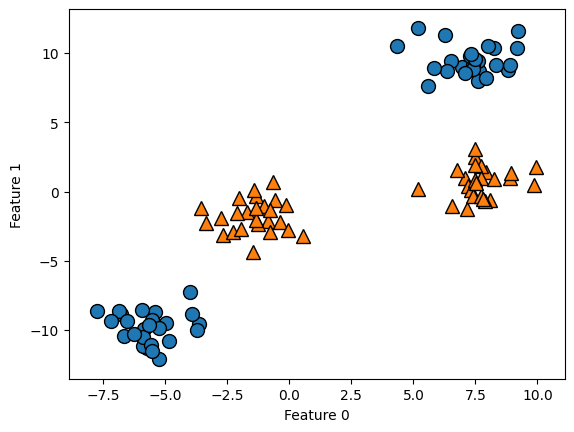

In [151]:
mglearn.discrete_scatter(X[:,0],X[:,1] , y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [152]:
from sklearn.svm import LinearSVC

In [153]:
linear_svc = LinearSVC().fit(X , y)

/Users/kato/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
